In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Netflix Dataset (7).csv")

In [4]:
# Display all columns in outputs
pd.set_option('display.max_columns', None)

In [5]:
# View first few rows
print("First 5 rows of the dataset:")
display(df.head())


First 5 rows of the dataset:


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [30]:
# Optional: Set style for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

In [31]:
# Fill missing values
df['Country'].fillna('Unknown', inplace=True)
df['Director'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Not Rated', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)

In [32]:
# Convert 'Release_Date' to datetime and extract year
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['year_added'] = df['Release_Date'].dt.year

In [33]:
# Step 3: Movies vs TV Shows Over the Years
content_trend = df.groupby(['year_added', 'Type']).size().reset_index(name='count')

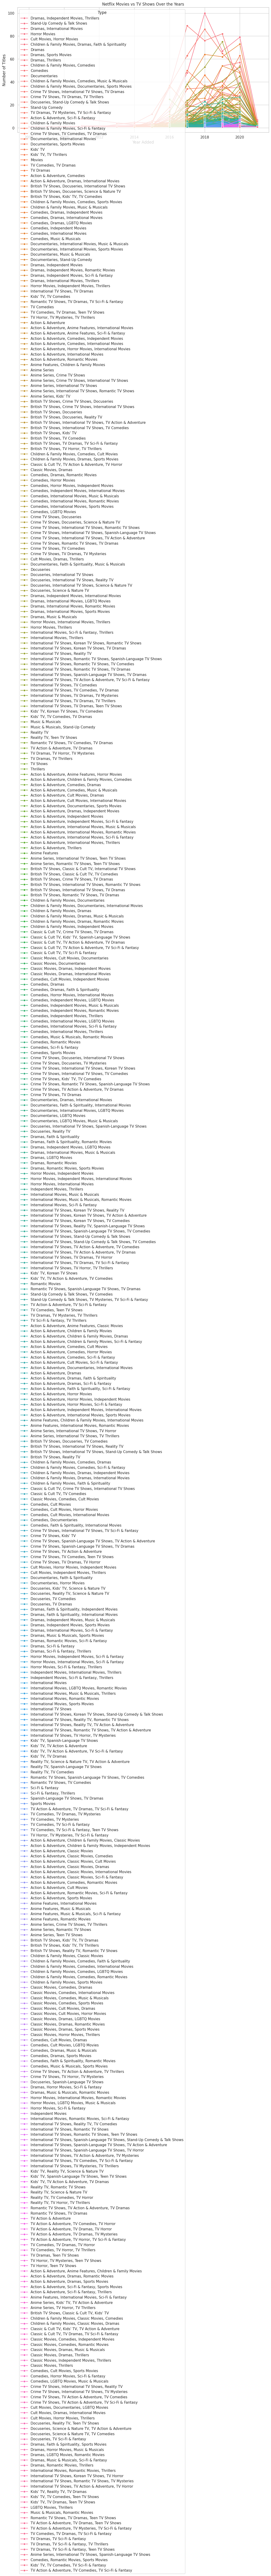

In [34]:
# Plot
plt.figure(figsize=(14,7))
sns.lineplot(data=content_trend, x='year_added', y='count', hue='Type', marker='o')
plt.title('Netflix Movies vs TV Shows Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()


In [35]:
# Step 4: Genre Trends
# Assuming your dataset has a column with genres; for example 'Category' or create a 'Genres' column
# Here I will use 'Category' as genres
df['genres'] = df['Category'].str.split(', ')  # adjust if your genres are in a different column
df_genres = df.explode('genres')


In [36]:
# Count top genres
top_genres = df_genres['genres'].value_counts().head(10)


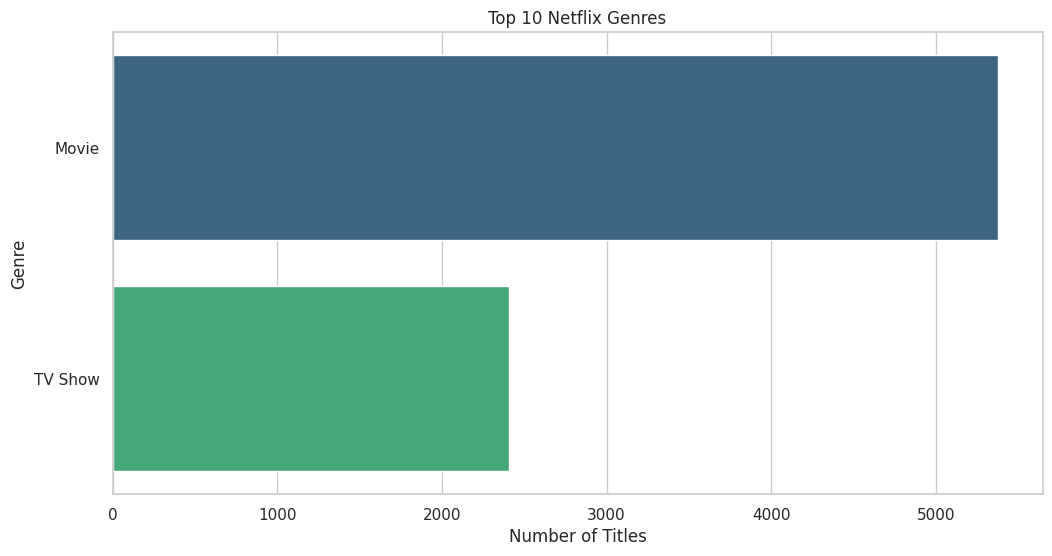

In [37]:
# Plot top genres
plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Netflix Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

In [38]:
# Step 5: Country-wise Contributions
df['countries'] = df['Country'].str.split(', ')
df_countries = df.explode('countries')

# Count titles per country
top_countries = df_countries['countries'].value_counts().head(10)

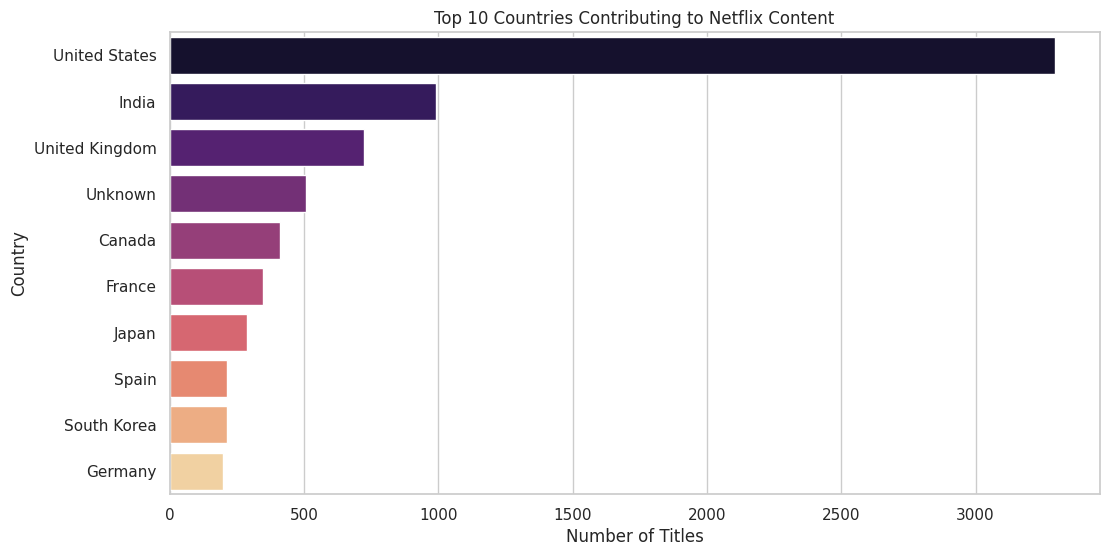

In [39]:
# Plot top countries
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Countries Contributing to Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

In [40]:
# Step 6: Optional Insights

# Most prolific directors
top_directors = df['Director'].value_counts().head(10)
print("Top 10 Directors:\n", top_directors)

Top 10 Directors:
 Director
Unknown                   2388
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Steven Spielberg            10
David Dhawan                 9
Name: count, dtype: int64


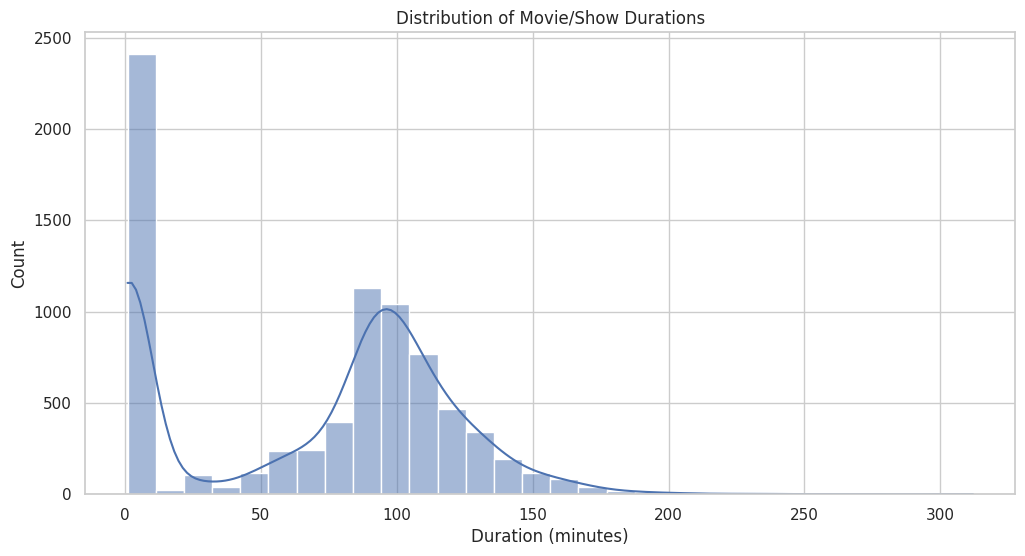

In [41]:
# Duration analysis
df['duration_min'] = df['Duration'].str.extract('(\d+)').astype(float)
sns.histplot(df['duration_min'].dropna(), bins=30, kde=True)
plt.title('Distribution of Movie/Show Durations')
plt.xlabel('Duration (minutes)')
plt.show()